In [200]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [201]:
# Function to generate a 5x5 Bingo card with unique numbers from 1 to 75
def generate_bingo_card():
    numbers = list(range(1, 76))  # Create a list of numbers from 1 to 75
    random.shuffle(numbers)  # Shuffle the list to randomize the order
    bingo_card = [numbers[i*5:(i+1)*5] for i in range(5)]  # Create a 5x5 list from the shuffled numbers
    return bingo_card

# Generate the Bingo card
bingo_card = generate_bingo_card()

# Print the Bingo card
for row in bingo_card:
    print(row)

[62, 10, 74, 69, 23]
[11, 5, 33, 50, 16]
[17, 8, 71, 31, 12]
[30, 45, 63, 46, 20]
[41, 1, 49, 9, 47]


In [202]:
# Function to pick a specified number of unique numbers out of 75
def pick_numbers(num_picks):
    numbers = list(range(1, 76))  # Create a list of numbers from 1 to 75
    random.shuffle(numbers)  # Shuffle the list to randomize the order
    picked_numbers = numbers[:num_picks]  # Select the first num_picks numbers from the shuffled list
    return picked_numbers

# Pick 40 numbers
picked_numbers = pick_numbers(40)
print("\nPicked Numbers:")
print(picked_numbers)


Picked Numbers:
[9, 7, 15, 62, 41, 63, 2, 17, 8, 37, 65, 52, 12, 23, 1, 50, 74, 28, 75, 44, 31, 40, 53, 71, 36, 21, 59, 70, 60, 49, 19, 16, 13, 64, 69, 45, 61, 14]


In [203]:
# Function to convert Bingo card to 0 and 1 based on picked numbers
def convert_card_to_binary(bingo_card, picked_numbers):
    binary_card = [[1 if number in picked_numbers else 0 for number in row] for row in bingo_card]
    return binary_card

binary_bingo_card = convert_card_to_binary(bingo_card, picked_numbers)
print("\nBinary Bingo Card:")
for row in binary_bingo_card:
    print(row)


Binary Bingo Card:
[1, 0, 1, 1, 1]
[0, 0, 0, 1, 1]
[1, 1, 1, 1, 1]
[0, 1, 1, 0, 0]
[1, 1, 1, 1, 0]


In [204]:
# Function to check if there's a Bingo in the binary card
def check_bingo(binary_card):
    size = len(binary_card)
    
    # Check rows
    for row in binary_card:
        if sum(row) == size:
            return True
    
    # Check columns
    for col in range(size):
        if sum(binary_card[row][col] for row in range(size)) == size:
            return True
    
    # Check diagonals
    if sum(binary_card[i][i] for i in range(size)) == size:
        return True
    if sum(binary_card[i][size - 1 - i] for i in range(size)) == size:
        return True
    
    return False

# Print if there's a Bingo
print("\nBingo Detected:", check_bingo(binary_bingo_card))


Bingo Detected: True


In [205]:
# Function to run a single simulation
def run_simulation(num_picks):
    # Generate the Bingo card
    bingo_card = generate_bingo_card()

    # Pick 40 numbers
    picked_numbers = pick_numbers(num_picks)

    # Convert the Bingo card to binary
    binary_bingo_card = convert_card_to_binary(bingo_card, picked_numbers)

    # Check if there's a Bingo
    return check_bingo(binary_bingo_card)

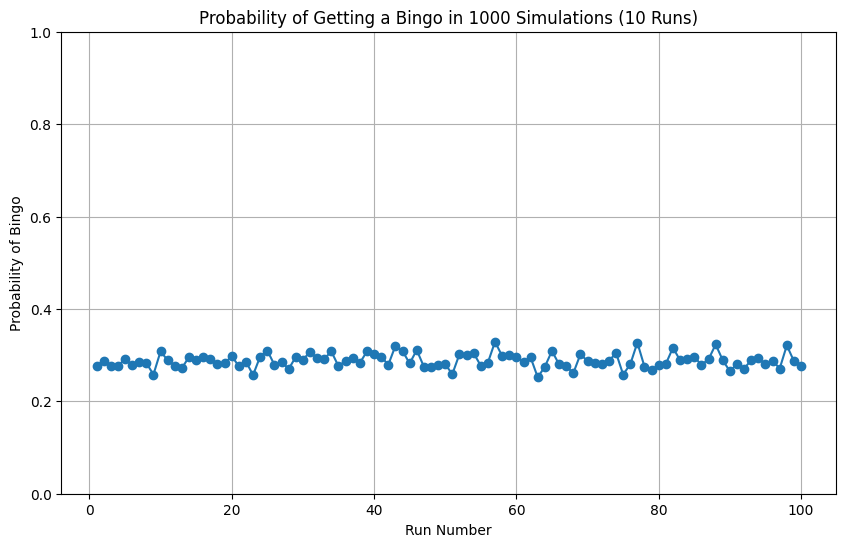

0.2879


In [206]:
# Run the simulation 10 times, each with 1000 Bingo card simulations
num_simulations_per_run = 10000
num_picks_list = range(30, 51)  # From 30 to 50
average_bingos = []

for num_picks in num_picks_list:
    bingo_count = sum(run_simulation(num_picks) for _ in range(num_simulations_per_run))
    average_bingo = bingo_count / num_simulations_per_run
    average_bingos.append(average_bingo)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(num_picks_list, average_bingos, marker='o', linestyle='-')
plt.title('Probability of Getting a Bingo with Different Number of Picks')
plt.xlabel('Number of Picks')
plt.ylabel('Probability of Bingo')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Print the results
for num_picks, prob in zip(num_picks_list, average_bingos):
    print(f"Number of Picks: {num_picks}, Probability of Bingo: {prob:.4f}")